In [1]:
%matplotlib widget
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams.update({'font.size': 7})

COLORS = ["red", "orange", "blue", "green", "red", "orange", "blue", "green"]
MARKERS = ["^", "v", "o", "s", "^", "v", "o", "s"]

In [2]:
mttf = [4000, 3000, 2000, 1500, 1000, 500, 300]

dry = [
    [0, 0, 0, 1.21, 3.71, 13.07, 21.56, ],
    [7.05, 7.05, 10.56, 10.81, 11.29, 14.8, 21.68, ],
    [0.68, 0.68, 1.17, 2.31, 9.75, 18.43, 24.03, ],
]

dv_base = [
    [0.9, 0.89, 1.57, 2.79, 5.46, 16.64, 28.77, ],
    [7.86, 8.09, 12.01, 12.2, 13.99, 18.34, 26.81, ],
    [0.93, 1.25, 1.95, 3.3, 11.82, 22.54, 30.15, ],
]

dv_retx = [
    [0, 0, 0, 1.24, 3.7, 13.37, 22.24, ],
    [6.9, 6.91, 10.53, 10.75, 11.3, 14.85, 21.95, ],
    [0.68, 0.67, 1.18, 2.28, 9.9, 18.7, 24.68, ],
]

ls_retx2 = [
    [0.12, 0.12, 0.12, 2.13, 5.33, 18.45, 31.26, ],
    [7.27, 7.28, 12.48, 12.37, 13.59, 18.96, 30.2, ],
    [0.91, 0.9, 2.1, 2.8, 11.55, 23.09, 30.86, ],
]

ls_base = [
    [0.69, 0.63, 1.2, 2.69, 5.85, 18.55, 32.01, ],
    [7.86, 7.9, 12.82, 13.06, 16.71, 19.86, 29.89, ],
    [1.02, 1.1, 2.47, 3.22, 13.21, 23.97, 31.9, ],
]

In [3]:
def do_plot(ax, xvals, yvals, fmt, color, label):
    avgs = np.mean(yvals, axis=0)
    yu = np.max(yvals, axis=0) - avgs
    yl = avgs - np.min(yvals, axis=0)
    
    ax.errorbar(xvals, avgs, yerr=[yu, yl],
                fmt=fmt, color=color,
                solid_capstyle='projecting', capsize=4,
                linewidth=1,markersize=4,capthick=0.75,
                label=label)

def fin_plot(fig, ax, name='figure'):
    ax.grid(linewidth=0.3)
    fig.set_size_inches(4, 2)
    display(fig)
    plt.savefig(f'figures/{name}.pdf', bbox_inches='tight', pad_inches=0.02)
    plt.close()

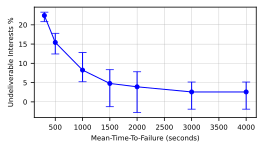

In [4]:
fig, ax = plt.subplots()
ax.set_ylabel('Undeliverable Interests %')
ax.set_xlabel('Mean-Time-To-Failure (seconds)')
do_plot(ax, mttf, dry, fmt='-o', color=COLORS[2], label='dry')
# ax.legend()
fin_plot(fig, ax, name='eval_dry')

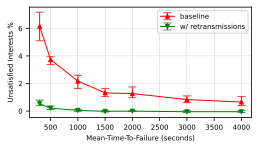

In [5]:
dv_base_c = np.array(dv_base) - np.array(dry)
dv_retx_c = np.array(dv_retx) - np.array(dry)

fig, ax = plt.subplots()
ax.set_ylabel('Unsatisfied Interests %')
ax.set_xlabel('Mean-Time-To-Failure (seconds)')
do_plot(ax, mttf, dv_base_c, fmt='-^', color=COLORS[0], label='baseline')
do_plot(ax, mttf, dv_retx_c, fmt='-v', color=COLORS[3], label='w/ retransmissions')
ax.legend()
fin_plot(fig, ax, name='eval_dv')

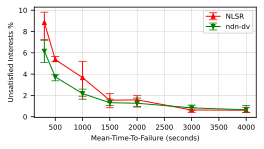

In [6]:
ls_base_c = np.array(ls_base) - np.array(dry)
dv_base_c = np.array(dv_base) - np.array(dry)

fig, ax = plt.subplots()
ax.set_ylabel('Unsatisfied Interests %')
ax.set_xlabel('Mean-Time-To-Failure (seconds)')
do_plot(ax, mttf, ls_base_c, fmt='-^', color=COLORS[0], label='NLSR')
do_plot(ax, mttf, dv_base_c, fmt='-v', color=COLORS[3], label='ndn-dv')
ax.legend()
fin_plot(fig, ax, name='eval_ls_dv')